# Exercise 15

## We will now to predict per capita crime rate using the Boston data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [2]:
df = pd.read_excel('Boston.xls')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
round(df.describe(), 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.03
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.95,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? 

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from regressors import stats

In [7]:
model = LinearRegression()

In [8]:
X = df.drop(['CRIM'], axis = 1)
y = df['CRIM']

In [9]:
cof_list = []
for column_number in range(len(X.columns)):
    X_single = X.iloc[:, column_number][:, np.newaxis]
    model.fit(X_single, y)
    p_list = stats.coef_pval(model, X_single, y)
    print(str(X.columns[column_number]).ljust(15) + str(model.intercept_).ljust(25) 
          + str(model.coef_).ljust(25) + str(round(p_list[0], 8)).ljust(15)
          + str(round(p_list[1], 8)))
    cof_list.append(model.coef_)
cof_list = np.hstack(cof_list)

ZN             4.453693759390921        [-0.07393498]            0.0            5.3e-07
INDUS          -2.063742805827856       [0.50977635]             0.00200824     0.0
CHAS           3.7444468399766455       [-1.89277655]            0.0            0.20784308
NOX            -13.719882976106692      [31.24853236]            0.0            0.0
RM             20.481803762269035       [-2.68405116]            0.0            0.0
AGE            -3.777906303418392       [0.10778623]             6.98e-05       0.0
DIS            9.499261605797495        [-1.55090167]            0.0            0.0
RAD            -2.287159449135958       [0.61791093]             3.3e-07        0.0
TAX            -8.528369098817826       [0.02974225]             0.0            0.0
PT             -17.646935356723354      [1.15198287]             3e-08          0.0
B              16.553529542702254       [-0.03627964]            0.0            0.0
LSTAT          -3.3305380590346627      [0.54880478]             

The first column is name of the features, second column is the intercept of the individual fit, the third column is fit coefficient of the model, third column is p-value of the intercept while the last column is p-value of the coefficients. Except CHAS feature all of the individual features are highly significnat. 

## Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

This can be done in statsmodels as well. But here is the use of scikit learn and regressor package to simulate what statsmode does.

In [10]:
model.fit(X, y)
stats.summary(model, X, y, X.columns)

Residuals:
Min      1Q  Median      3Q     Max
-75.0512 -1.0188  0.3533  2.1198  9.9237


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept  17.033225    6.896161   2.4700  0.013842
ZN           0.044855    0.014695   3.0523  0.002390
INDUS       -0.063855    0.075048  -0.8509  0.395251
CHAS        -0.749134    1.161895  -0.6448  0.519381
NOX        -10.313532    4.882291  -2.1124  0.035139
RM           0.430130    0.491668   0.8748  0.382077
AGE          0.001452    0.013080   0.1110  0.911673
DIS         -0.987176    0.244638  -4.0353  0.000063
RAD          0.588209    0.080157   7.3382  0.000000
TAX         -0.003780    0.001407  -2.6856  0.007477
PT          -0.271081    0.121331  -2.2342  0.025906
B           -0.007538    0.001582  -4.7644  0.000002
LSTAT        0.126211    0.063191   1.9973  0.046329
MV          -0.198887    0.039883  -4.9867  0.000001
---
R-squared:  0.45401,    Adjusted R-squared:  0.43958
F-statistic: 31.47 on 13 features


Looking at the p-values the null hypothesis can be rejected for the INDUS, CHAS, NOX, RM, AGE, PT, LSTAT variables in the presence of the remaining variables. Others have 99% or higher significance. They are ZN, DIS, RAD, TAX, B, MV.

In [11]:
print('SSE: \t\t\t', stats.sse(model, X, y))
print('Adjusted R2 score: \t', stats.adj_r2_score(model, X, y))
print('F-statistics: \t\t', stats.f_stat(model, X, y))

SSE: 			 20399.930939841983
Adjusted R2 score: 	 0.4395838345720853
F-statistics: 		 31.47046519978721


## Create a plot displaying the univariate regression coefficients on the x-axis, and the multiple regression coefficients on the y-axis.

In [12]:
model.intercept_, model.coef_

(17.0332254033135,
 array([ 4.48552138e-02, -6.38548287e-02, -7.49133636e-01, -1.03135315e+01,
         4.30130434e-01,  1.45164053e-03, -9.87175625e-01,  5.88208588e-01,
        -3.78001633e-03, -2.71080510e-01, -7.53750573e-03,  1.26211368e-01,
        -1.98886813e-01]))

In [13]:
col_list = df.columns

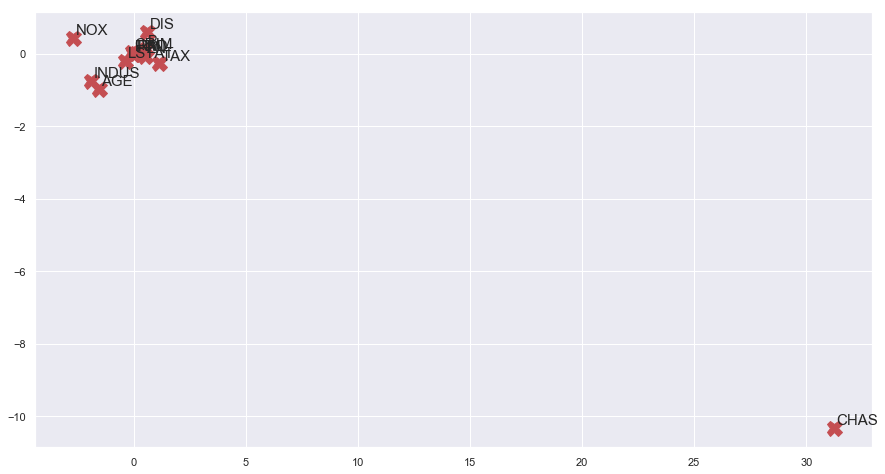

In [14]:
plt.figure(figsize= (15, 8))
for i in range(len(col_list) - 1):
    plt.plot(cof_list[i], model.coef_[i], 'rX', markersize = 15)
    plt.text(cof_list[i] + 0.1, model.coef_[i] + 0.1, col_list[i], fontsize = 15)

## Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form $ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$ 

In [15]:
col_names = X.columns
XX = pd.DataFrame()
for col_name in col_names:
    XX[str(col_name) + '-Sq'] = X[col_name] ** 2
    XX[str(col_name) + '-Cu'] = X[col_name] ** 3
    
X2 = pd.concat([X, XX], axis = 1)
len(X2.columns)

39

In [16]:
model = LinearRegression()
model.fit(X2, y)
stats.summary(model, X2, y, X2.columns)

Residuals:
Min      1Q  Median      3Q      Max
-67.4128 -1.0777  0.1801  1.5749  15.3864


Coefficients:
              Estimate                                    Std. Error              t value   p value
_intercept  -45.724185                           (70368744177664+0j)              (-0+0j)  1.000000
ZN           -0.052985                      (-0+30165643844039.906j)                   0j  1.000000
INDUS         0.144231                    (-0.000955+374805.743585j)              (-0-0j)  1.000000
CHAS          0.114226        (-13343372.051886+155738486608604.75j)              (-0-0j)  1.000000
NOX         469.113099                      (17513.201983-0.019544j)          (0.0268+0j)  0.978641
RM           -1.537729                        (-5.038612+30.137475j)     (0.0083+0.0496j)  0.959883
AGE           0.088118                           (0.138207+1.3e-05j)     (0.6376-0.0001j)  0.524033
DIS         -10.077116                          (1.957987+0.004793j)    (-5.1466+0.0126j)  0.0

Inclusion of higher order polynomial have made p-value of some of the lienar order features significantly higher while p-value of the some of the higher order feature being singnificantly lowered. So yes, there is an evidence of the non-linearity. But this is complicated and requires the further attention. 